In [ ]:
#!pip install scanpyad = data.copy()
# ad.raw.X.data = np.exp(ad.raw.X.data)

In [1]:
import random

# import igraph as ig
import mygene

# Operating System functionality, especially for traversing directory structures
import os

# Specialized container datatypes, i.e. specialized versions of lists, dictionaries, etc.
import collections as coll

# Date and time functions, useful for timestamping file names of figures.
import datetime

# Functional programming tools.
import itertools as itt

# Pretty-printing text by wrapping and filling lines.
import textwrap as tw

# Well-known package for n-dimensional arrays, numerical functions, linear algebra, etc.
import numpy as np

# Data analysis package.
import pandas as pd

# "Default" plotting package of Python.
import matplotlib as mpl
import matplotlib.pyplot as plt

# Matplotlib colours module.
import matplotlib.colors as mpcol

# Package improving Matplotlib's default plot style.
import seaborn as sns

# Single Cell Analysis in Python
import scanpy as sc

import anndata as ad

import louvain


# for pairwise analysis - code adapted from https://www.drawingfromdata.com/ 􏰂→making-a-pairwise-distance-matrix-with-pandas
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from sklearn.metrics.pairwise import cosine_similarity

# for heatmap visualization
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.5)

import os
import pickle

C:\tools\Anaconda3\envs\robin_pyscenic\lib\site-packages\anndata\_core\anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex
C:\tools\Anaconda3\envs\robin_pyscenic\lib\site-packages\dask\config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


# Read in Deep Sequencing Data

In [2]:
# A1 = pd.read_csv('GSM1819200_expression_1.tsv', header=0, sep='\t')

In [3]:
# take in tsv of Id and count, return dataframe (right now using ensemble IDs, but having function will allow me
# to easily change to gene names if I want to/figure out how to)
def read_bulk_data(csv):
    # _ = pd.read_csv(tsv, header=0, sep='\t')
    _ = pd.read_csv(tsv, header=0)
    return _

In [22]:
#bulk_df = pd.read_csv("asl320.RSEM.counts.csv", header=0)
bulk_df = pd.read_csv("bulk_ob_counts_gene_symbol.csv", header=0)
bulk_df

S_M_1  S_M_2  S_M_3  S_T_1  S_T_2  S_T_3             ID
0       1216    784    789   2027   1865   2115          Gnai3
1          0      0      0      0      0      0           Pbsn
2         65     50     39     60     79     37          Cdc45
3          0      0      0      1      2      0            H19
4         10     19     27     41     22     14          Scml2
...      ...    ...    ...    ...    ...    ...            ...
51907      0      0      0      0      0      0        Gm18631
51908      0      0      0      1      2      1        Gm33115
51909      4     14      4     15      4      3        Gm48139
51910      0      0      0      0      0      1         Gm3800
51911      0      0      0      0      0      0  2900042G08Rik

[51912 rows x 7 columns]

In [23]:
def sort_bulk_data(df, col_name):
    new_df = df[["ID", col_name]]
    new_df.columns = ["ID", "Count"]
    return new_df

In [24]:
M1 = sort_bulk_data(bulk_df, "S_M_1")
M2 = sort_bulk_data(bulk_df, "S_M_2")
M3 = sort_bulk_data(bulk_df, "S_M_3")
T1 = sort_bulk_data(bulk_df, "S_T_1")
T2 = sort_bulk_data(bulk_df, "S_T_2")
T3 = sort_bulk_data(bulk_df, "S_T_3")

# M1 = bulk_df[['ENSMUSG','S_M_1']]
# M2 = bulk_df[['ENSMUSG','S_M_2']]
# M3 = bulk_df[['ENSMUSG','S_M_3']]
# T1 = bulk_df[['ENSMUSG','S_T_1']]
# T2 = bulk_df[['ENSMUSG','S_T_2']]
# T3 = bulk_df[['ENSMUSG','S_T_3']]

In [25]:
M1

ID  Count
0              Gnai3   1216
1               Pbsn      0
2              Cdc45     65
3                H19      0
4              Scml2     10
...              ...    ...
51907        Gm18631      0
51908        Gm33115      0
51909        Gm48139      4
51910         Gm3800      0
51911  2900042G08Rik      0

[51912 rows x 2 columns]

### reading in bulk auc mtx

In [2]:
DATA_FOLDER = "D:\Robin"
bulk_data_fname = os.path.join(DATA_FOLDER, "bulk_ob_counts_gene_symbol.csv")
bulk_auc_mtx_fname = os.path.join(DATA_FOLDER,"bulk_OB_auc_mtx.p")

In [3]:
with open(bulk_auc_mtx_fname, "rb") as infile:
    bulk_auc_mtx = pickle.load(infile)

In [4]:
bulk_auc_mtx

Regulon   Alx3(+)  Arid5b(+)   Arnt(+)   Atf2(+)   Atf4(+)  Bach2(+)  \
Cell                                                                   
M1       0.026486   0.072614  0.000000  0.139956  0.338920  0.156794   
M2       0.023517   0.118348  0.000000  0.151390  0.327347  0.156370   
M3       0.023320   0.112063  0.000000  0.157323  0.326296  0.153551   
T1       0.000000   0.106472  0.001204  0.155096  0.293493  0.162668   
T2       0.000000   0.064774  0.005914  0.131895  0.335794  0.163144   
T3       0.000000   0.075000  0.026663  0.143443  0.327232  0.166016   

Regulon  Barx1(+)  Bcl11a(+)  Bclaf1(+)   Bmyc(+)  ...   Usf1(+)   Usf2(+)  \
Cell                                               ...                       
M1       0.016741   0.259859   0.167506  0.290128  ...  0.207886  0.161187   
M2       0.028275   0.278492   0.157794  0.260802  ...  0.198692  0.134374   
M3       0.026860   0.261957   0.160170  0.257966  ...  0.189752  0.135714   
T1       0.004650   0.296099   0.172046  0.257773  ...  0.162816  0.127312   
T2       0.010905   0.231361   0.171594  0.298295  ...  0.214731  0.146470   
T3       0.006014   0.257290   0.175888  0.291804  ...  0.199580  0.150140   

Regulon   Vax1(+)    Yy1(+)  Zfp110(+)  Zfp143(+)  Zfp398(+)  Zfp467(+)  \
Cell                                                                      
M1       0.082494  0.192921   0.125391   0.107385   0.185417   0.125116   
M2       0.091811  0.186921   0.114312   0.078926   0.169461   0.123260   
M3       0.079702  0.188484   0.118117   0.085643   0.142611   0.128834   
T1       0.077345  0.172862   0.106170   0.110182   0.213036   0.121525   
T2       0.069481  0.208177   0.135095   0.125089   0.230203   0.131604   
T3       0.072716  0.200762   0.126853   0.127606   0.213697   0.128157   

Regulon  Zfp523(+)   Zic1(+)  
Cell                          
M1        0.093679  0.146129  
M2        0.083177  0.145908  
M3        0.083810  0.152478  
T1        0.102653  0.144523  
T2        0.097962  0.146684  
T3        0.092705  0.145935  

[6 rows x 125 columns]

# Read in Single Nuclei Data - From Sara - (skipping this for now)

In [ ]:
%run From_Sara/scanpy_aid.py

In [ ]:
input_path = "From_Sara/replicate_2/filtered_feature_bc_matrix/"
data_r2 = read_piriform_adult(input_path)

input_path = "From_Sara/replicate_3/filtered_feature_bc_matrix/"
data_r3 = read_piriform_adult(input_path)

# Pooling the two replicates
data = data_r2.concatenate(data_r3)

# And verifying if all went well by looking at the dimensions
print(data_r2)
print(data_r3)
print(data)

In [ ]:
import collections as coll

# Print all genes that are present more than once as (name: found x times)
tw.wrap(
    ", ".join(
        "{0}: {1}".format(name, ndup)
        for name, ndup in coll.Counter(data.var_names).most_common(56)
    ),
    70,
)

In [ ]:
# Add '-1', '-2' etc. to names to make them unique
data.var_names_make_unique()
sndata = data
del data

In [ ]:
sndata

# Generate Simulated Nuclei

## Prep work

In [ ]:
# calculating how many genes... aiming to do this based on distrubtion in single nuclei data
# --> so how do I get that distribution... could calculate based on each cell? that seems like it'll take a long time...
## use that weird [:] feature!!! code taken from clustering below


def calc_distr_of_how_many_genes(
    data,
):  # takes in AnnData matrix, returns list of choices for random.choice
    # Add the total counts per cell as observations-annotation to data
    data.obs["n_counts"] = data.X.sum(axis=1).A1
    # Computing how many genes are expressed in each cell
    data.obs["n_genes"] = np.sum(data.X > 0, axis=1).A1

    distr = []
    for num in data.obs["n_counts"]:
        distr.append(int(num))
    return distr

In [ ]:
# takes in a datatable of reads per gene from bulk seq and how many genes to select returns list of genes based on
# bulk probability (selecting multiple at once is faster)
def choose_genes(dataFrame, how_many_genes):
    list_of_candidates = []
    list_of_probabilities = []
    for index in dataFrame.index:
        list_of_candidates.append(dataFrame["Id"][index])
        list_of_probabilities.append(dataFrame["Count"][index])
    genes = random.choices(
        population=list_of_candidates, weights=list_of_probabilities, k=how_many_genes
    )

    return genes


# THIS DOES RANDOM CHOICE WITH REPLACEMENT - IS THAT RIGHT? SAME NUCLEUS CAN HAVE MULTIPLE READS OF SAME GENE?

In [ ]:
# generates simulated nuclei --> returns a dataframe: each row is a simulated nucleus, each column is a gene
# dataset is string that will be set as obs
def generate_nuclei_from_bell_curve(
    bulkDataFrame,
    ID_header,
    sym_header,
    distr_of_how_many_genes,
    num2gen,
    dataset,
    layer,
    drop,
):
    print("this function is running: " + dataset)
    # bulkDataFrame is how many reads were found of each gene in bulk seq data.
    # Mean and sdev refer to normal distribution of how many different genes each cell expressed
    # num2gen = how many simulated nuclei to generate

    # choiceArray = prob_of_gene_expression(bulkDataFrame)

    # replace NaN with ENSMUST ID (if don't have symbol)

    for index, symbol in enumerate(symbol_header):
        if symbol is np.nan:
            if drop == False:
                symbol_header[index] = header[index]
                # print('drop was false')
            if drop == True:
                symbol_header[index] = "to drop"
                # print('to drop added to symbol_header')

    list_of_lists = []
    zero_list = [0] * len(header)
    for i in range(0, num2gen):
        list_of_lists.append(zero_list)
    print("list_of_lists: " + str(len(list_of_lists)))
    df = pd.DataFrame(list_of_lists, columns=ID_header)
    # print(df)
    # add the genes - make a list
    for index in range(0, num2gen):  # each simulated nucleus
        # how_many_genes = int(round(np.random.normal(mean, sdev)))
        how_many_genes = random.choice(distr_of_how_many_genes)
        genes = choose_genes(bulkDataFrame, how_many_genes)
        # print(genes)
        for gene in genes:
            df.at[index, gene] = df.at[index, gene] + 1
        print("nucleus " + str(index) + " done")
    # return df

    df.columns = sym_header  # replacing column names with symbol names now that nuclei are generated

    # drop NaN (if no symbol, just delete it)
    if drop == True:
        df = df.T
        df = df.dropna()
        print("just did dropna")
        df = df.T
        df.drop("to drop", axis=1)
        print("dropped")

    ann_data = ad.AnnData(X=df)
    ann_data.obs["dataset"] = dataset
    ann_data.obs["layer"] = layer
    return ann_data

    # df2 = pd.DataFrame([[5, 6], [7, 8]], columns=header)
    # simulated_df.append(list)
    # print(df2)

In [ ]:
# generates simulated nuclei --> returns a dataframe: each row is a simulated nucleus, each column is a gene
# dataset is string that will be set as obs
##INSTEAD OF USING A BELL CURVE, PUTTING THE SAME NUMBER OF GENES IN EACH NUCLEUS
##Don't need a symbol header because leaving things as IDs
def generate_nuclei_known_number(
    bulkDataFrame, total_nuclei_sequenced, num2gen, spec_dataset, general_dataset
):
    print("this function is running: " + spec_dataset)
    # bulkDataFrame is how many reads were found of each gene in bulk seq data.
    # Mean and sdev refer to normal distribution of how many different genes each cell expressed
    # num2gen = how many simulated nuclei to generate

    ##Calculate how many genes/nucleus
    how_many_genes = (
        bulkDataFrame.sum() / total_nuclei_sequenced
    )  # avg genes per nucleus

    # choiceArray = prob_of_gene_expression(bulkDataFrame)
    header = bulkDataFrame["Id"].values.tolist()

    list_of_lists = []
    zero_list = [0] * len(header)
    for i in range(0, num2gen):
        list_of_lists.append(zero_list)
    print("list_of_lists: " + str(len(list_of_lists)))
    df = pd.DataFrame(list_of_lists, columns=header)
    # print(df)
    # add the genes - make a list
    for index in range(0, num2gen):  # each simulated nucleus
        # how_many_genes = int(round(np.random.normal(mean, sdev)))
        genes = choose_genes(bulkDataFrame, how_many_genes)
        # print(genes)
        for gene in genes:
            df.at[index, gene] = df.at[index, gene] + 1
        print("nucleus " + spec_dataset + str(index) + " done")
    # return df

    # df.columns = sym_header #replacing column names with symbol names now that nuclei are generated (not doing this)

    ann_data = ad.AnnData(X=df)
    ann_data.obs["specific_dataset"] = spec_dataset
    ann_data.obs["general_dataset"] = general_dataset
    return ann_data

    # df2 = pd.DataFrame([[5, 6], [7, 8]], columns=header)
    # simulated_df.append(list)
    # print(df2)

## Actually generating the nuclei, storing in AnnData objects

In [ ]:
# M1_ad = generate_nuclei_known_number(bulkDataFrame, total_nuclei_sequenced, num2gen, spec_dataset, general_dataset)
M1_ad = generate_nuclei_known_number(
    M1, 3062, 1000, "M1", "mitral"
)  # 20,000 nuclei - but that's a lot to generate? start with 500 each?
M2_ad = generate_nuclei_known_number(M2, 1305, 1000, "M2", "mitral")
M3_ad = generate_nuclei_known_number(M3, 1176, 1000, "M3", "mitral")

T1_ad = generate_nuclei_known_number(T1, 14264, 1000, "T1", "tufted")
T2_ad = generate_nuclei_known_number(T2, 41081, 1000, "T2", "tufted")
T3_ad = generate_nuclei_known_number(T3, 44169, 1000, "T3", "tufted")

In [ ]:
A1_ad

In [ ]:
# concatenating into one anndata
sim_OB = M1_ad.concatenate(M2_ad, M3_ad, T1_ad, T2_ad, T3_ad)

In [ ]:
# once nuclei are generated, saving them so I can just load them in instead of generating them again
sim_OB.write("simulated_OB_500_each.h5ad")

In [ ]:
# print(simulated_df_B1.at[0,'ENSMUST00000095806'])

## Reading in nuclei that I've already generated

In [4]:
sim_data = ad.read_h5ad('simulated_OB_500_each.h5ad')

In [5]:
sim_data

AnnData object with n_obs × n_vars = 6000 × 51912 
    obs: 'batch', 'general_dataset', 'specific_dataset'

TypeError: '(slice(None, None, None), 1)' is an invalid key

# Clustering - From Sara

In [4]:
data = sim_data

In [ ]:
# Set the cut-off
MITO_CUTOFF = 0.015

mito_genes = [name for name in data.var_names if name.startswith("mt-")]
# For each cell compute fraction of counts in mito genes vs. all genes.
# The `.A1` is only necessary because X is sparse. It transforms to a (I TOOK OUT)
# dense array after summing
data.obs["percent_mito"] = np.sum(data[:, mito_genes].X, axis=1) / np.sum(
    data.X, axis=1
)

# Add the total counts per cell as observations-annotation to data
data.obs["n_counts"] = data.X.sum(axis=1)

# Computing how many genes are expressed in each cell
data.obs["n_genes"] = np.sum(data.X > 0, axis=1)

# Computing in how many cells a gene is found
# data.var['n_cells'] = np.sum(data.X > 0, axis=0) #(not working, not sure why)

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(15, 7.5))

# Global view
sc.pl.scatter(data, x="n_counts", y="percent_mito", show=False, ax=axs[0, 0])
sc.pl.scatter(data, x="n_genes", y="percent_mito", show=False, ax=axs[0, 1])
sc.pl.scatter(data, x="n_counts", y="n_genes", show=False, ax=axs[0, 2])

# Add a horizontal line at the mito percent cut-off
axs[0, 0].axhline(y=MITO_CUTOFF)
axs[0, 1].axhline(y=MITO_CUTOFF)

# Zoom in on cut-off
sc.pl.scatter(data, x="n_counts", y="percent_mito", show=False, ax=axs[1, 0])
sc.pl.scatter(data, x="n_genes", y="percent_mito", show=False, ax=axs[1, 1])

axs[1, 0].set_ylim([0.0, 0.15])
axs[1, 1].set_ylim([0.0, 0.15])
# Add a horizontal line again
axs[1, 0].axhline(y=MITO_CUTOFF)
axs[1, 1].axhline(y=MITO_CUTOFF)

In [ ]:
# How many cells do we classify as dying?
n_dying = np.sum(data.obs["percent_mito"] >= MITO_CUTOFF)
n_alive = np.sum(data.obs["percent_mito"] < MITO_CUTOFF)

print("Dying: {}\nAlive: {}".format(n_dying, n_alive))

In [ ]:
# We remove cells that have a high fraction of mito genes, as that marks dead/dying cells.
data = data[data.obs["percent_mito"] < MITO_CUTOFF, :]

In [6]:
# Parsing transcription factor gene names from http://genome.gsc.riken.jp/TFdb/tf_list.html
def known_transcription_factors():
    infname = "../From_Sara/mm_transcription_factors-mm_tf_list.html"
    with open(infname) as infile:
        return set(
            [line.split("<td")[3][1:-5] for line in infile if line.startswith("<tr>")]
        )


TFs = known_transcription_factors()
transfac_genes = [name for name in data.var_names if name in TFs]

In [7]:
# And which are the most expressed transcription factors?
top = 30

# maxs = data[:, transfac_genes].X.max(axis=0).toarray()[0] (#commented out in Sara's)
maxs = data[:, transfac_genes].X.sum(axis=0)
indices = np.argpartition(maxs, kth=len(maxs) - top)[-top:]
most_expressed_tfs = data[:, transfac_genes].var_names[indices].sort_values().tolist()
most_expressed_tfs

IndexError: arrays used as indices must be of integer (or boolean) type

In [40]:
data = sim_data

In [41]:
data = normalize(data)

NameError: name 'normalize' is not defined

In [42]:
n_bins = 50
result = filter_by_expr_dispersion(data, n_bins, dry_run=True)

NameError: name 'filter_by_expr_dispersion' is not defined

In [ ]:
data = filter_by_expr_dispersion(data, n_bins, dry_run=False)

In [ ]:
# data = regress_and_scale(data)
sc.pp.scale(data)

In [ ]:
sc.tl.pca(data, svd_solver="arpack", n_comps=30)
sc.pl.pca_variance_ratio(data, log=True, save=True)

## Clustering/tSNE from Act-Seq document 

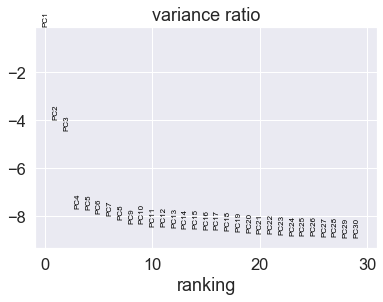

In [43]:
sc.tl.pca(data, n_comps=30, svd_solver="arpack")
sc.pl.pca_variance_ratio(data, log=True, save=True)

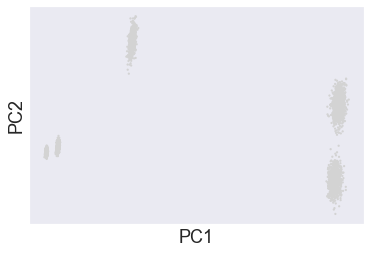

//anaconda3/envs/robin/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8942 missing from current font.
  font.set_text(s, 0.0, flags=flags)
//anaconda3/envs/robin/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 8942 missing from current font.
  font.load_char(ord(s), flags=flags)


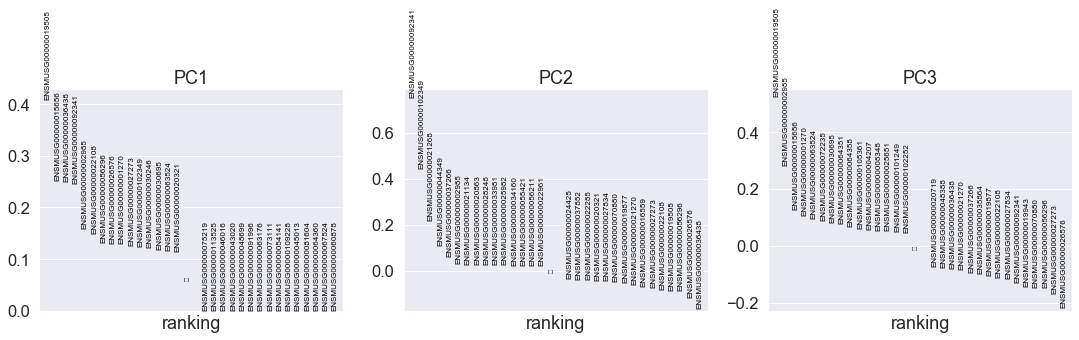

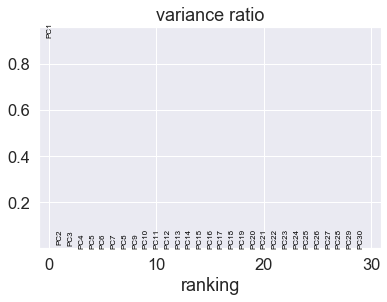

In [44]:
sc.pl.pca_overview(data)

### Getting gene symbols that define each PC

In [ ]:
sc.tl.pca(data, svd_solver='arpack', random_state=0)
# Get loadings for each gene for each PC
df_loadings = pd.DataFrame(data.varm['PCs'], index=data.var_names)
# get rank of each loading for each PC
df_rankings = pd.DataFrame((-1 * df_loadings.values).argsort(0).argsort(0), index=df_loadings.index, columns=df_loadings.columns)
# c.f. with df_loadings.apply(scipy.stats.rankdata, axis=0)
# evaluate 

In [51]:
top_PC1_genes = df_loadings[0].sort_values(ascending=False).head(10)

In [52]:
top_PC2_genes = df_loadings[1].sort_values(ascending=False).head(10)

In [54]:
top_PC3_genes = df_loadings[2].sort_values(ascending=False).head(10)

In [55]:
#Now need to mg.querymany to convert gene ids to symbols
mg = mygene.MyGeneInfo()

['ENSMUSG00000019505',
 'ENSMUSG00000015656',
 'ENSMUSG00000036438',
 'ENSMUSG00000092341',
 'ENSMUSG00000002985',
 'ENSMUSG00000022108',
 'ENSMUSG00000056296',
 'ENSMUSG00000026576',
 'ENSMUSG00000001270',
 'ENSMUSG00000027273']

In [67]:
mg_dataframe = mg.querymany(
    top_PC3_genes.index.tolist(), scopes="ensembl.gene", fields="symbol", species="mouse", as_dataframe=True, 
)

mg_dataframe['symbol'].values.tolist()

In [77]:
def color_in_PCA(adata, color_parameter):
    sc.pl.pca(adata, color=color_parameter)
    sc.pl.pca(adata, color=color_parameter, components = ['3,2'])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


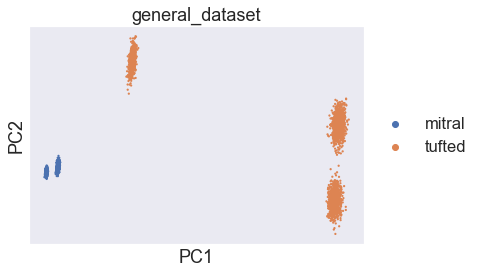

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


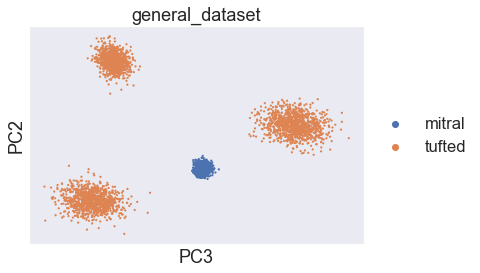

In [24]:
color_in_PCA(data, "general_dataset")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

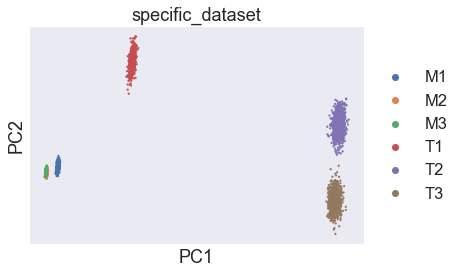

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

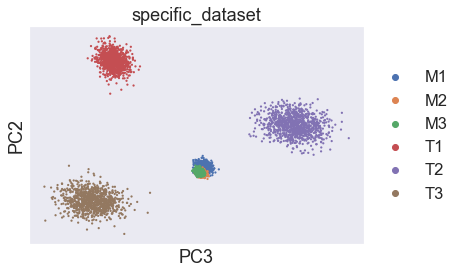

In [25]:
color_in_PCA(data, "specific_dataset")

# Plotting tsne

In [71]:
pcs_used = 3

In [72]:
def plot_graph(data, seed, dotsize, ax):
    """
    Spring-based projection with pretty colouring of the Louvain clusters.
    """
    # Set nice colours
    data.uns["louvain_colors"] = [
        mpcol.to_hex(c)
        for c in sns.color_palette("hls", len(data.obs["louvain"].cat.categories))
    ]

    # Prepare plot if we did not get one
    if not ax:
        fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    else:
        fig = ax.get_figure()

    # Fill in a default value
    if not dotsize:
        dotsize = 12

    # Plot
    sc.tl.draw_graph(data, random_state=seed)
    sc.pl.draw_graph(
        data,
        color="louvain",
        size=dotsize,
        title="Spring-based projection",
        legend_loc="on data",
        show=False,
        ax=ax,
    )
    return data, fig, ax


def plot_umap(data, seed, dotsize, ax):
    """
    UMAP projection and pretty colouring of the Louvain clusters.
    """
    # Colours
    data.uns["louvain_colors"] = [
        mpcol.to_hex(c)
        for c in sns.color_palette("hls", len(data.obs["louvain"].cat.categories))
    ]

    # Prepare plot if we did not get one
    if not ax:
        fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    else:
        fig = ax.get_figure()

    # Fill in a default value
    if not dotsize:
        dotsize = 12

    # Plot
    sc.tl.umap(data, random_state=seed)
    sc.pl.umap(
        data,
        color="louvain",
        size=dotsize,
        title="UMAP projection",
        legend_loc="on data",
        show=False,
        ax=ax,
    )
    return data, fig, ax


def plot_tsne(data, pcs_used, seed, dotsize, ax):
    """
    tSNE projection and colouring of Louvain clusters.
    """
    # Colours
    data.uns["louvain_colors"] = [
        mpcol.to_hex(c)
        for c in sns.color_palette("hls", len(data.obs["louvain"].cat.categories))
    ]

    # Prepare plot if we did not get one
    if not ax:
        fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    else:
        fig = ax.get_figure()

    # Fill in a default value
    if not dotsize:
        dotsize = 12

    # Plot
    sc.tl.tsne(data, n_pcs=pcs_used, random_state=seed)
    sc.pl.tsne(
        data,
        color="louvain",
        size=dotsize,
        legend_loc="on data",
        title="tSNE projection",
        show=False,
        ax=ax,
    )
    return data, fig, ax

In [73]:
def cluster_and_plot(data):

    nbs = 25
    sc.pp.neighbors(data, n_pcs=pcs_used, n_neighbors=nbs)
    sc.tl.louvain(data)

    # Prepare a figure to show three 2D projections of the cells and colour them by Louvain communities (=clusters).
    # Be careful interpreting the tSNE projection, see <https://distill.pub/2016/misread-tsne/>. Also, note that the `seed` and `dotsize` variables are re-used in all three plots.

    seed = 18
    dotsize = 12

    fig, axes = plt.subplots(1, 3, figsize=(15, 5.02))

    # Plot the "classical" tSNE projection
    _ = plot_tsne(data, pcs_used, seed, dotsize, axes[0])

    # Plot the UMAP projection, which maintains the distances between clusters better than tSNE
    _ = plot_umap(data, seed, dotsize, axes[1])

    # Plot a spring-based projection, a classical algorithm to project graphs onto 2D
    _ = plot_graph(data, seed, dotsize, axes[2])

//anaconda3/envs/robin/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 5 separate connected components using meta-embedding (experimental)
  n_components
//anaconda3/envs/robin/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


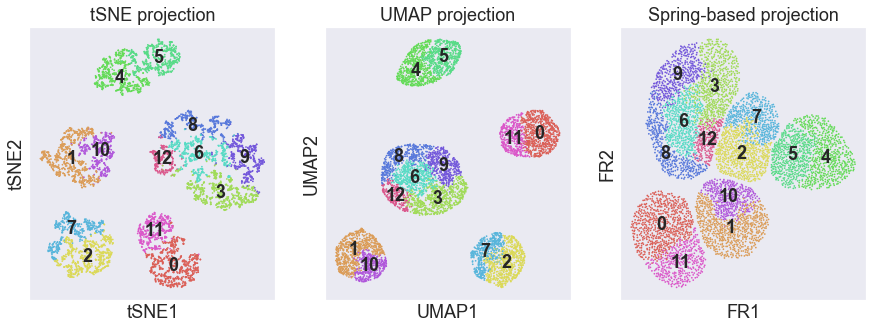

In [74]:
cluster_and_plot(data)

### Trying to color by cluster

In [75]:
def color_umap_and_tsne(adata, color_parameter):
    sc.pl.umap(adata, color=color_parameter)
    sc.pl.tsne(adata, color=color_parameter)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


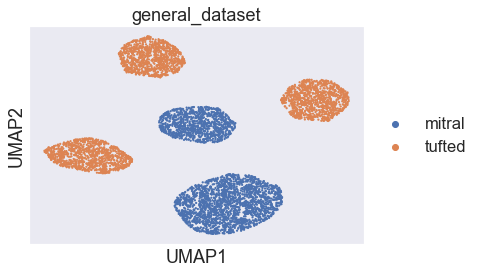

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


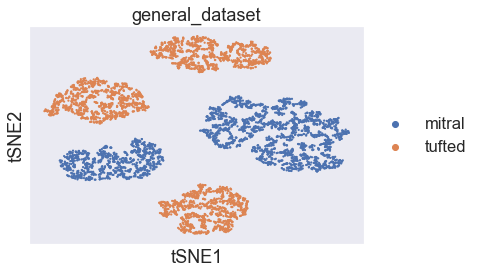

In [34]:
color_umap_and_tsne(data, "general_dataset")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

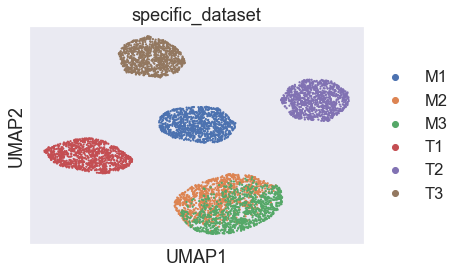

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

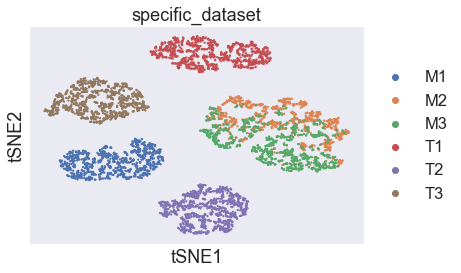

In [35]:
color_umap_and_tsne(data, "specific_dataset")

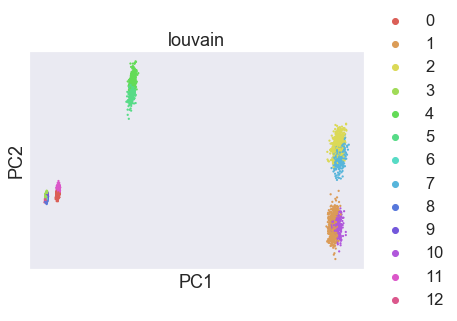

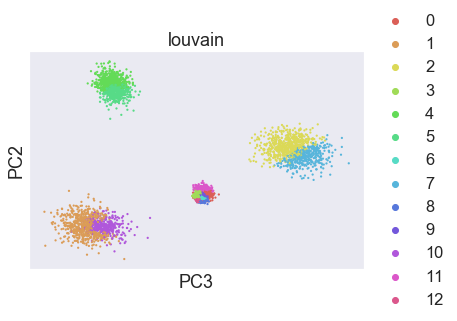

In [78]:
color_in_PCA(data, "louvain")

In [ ]:
pcs_used, nbs, seed = 18, 30, 6
data, fig, ax = calc_and_plot_graph(data, pcs_used, nbs, seed)
fig.savefig("./figures/pca_clustering.png")

In [ ]:
# Looking at main cell types markers and PCX layers markers
plot_expression_on_graph(
    data,
    [
        "Rbfox3",
        "Map2",
        "Slc17a8",
        "Gad2",
        "Slc17a7",
        "Slc17a6",
        "Mbp",
        "Mog",
        "Gfap",
        "Syn",
        "Tbr2",
        "Tbr1",
        "Rorb",
        "Tmem119",
        "Siglech",
        "Pdgfra",
        "Dcx",
        "Blc11a",
        "Blc11b",
        "Tle3",
        "Cux1",
        "Sox9",
        "Barhl1",
        "Satb2",
        "Mef2c",
        "Foxp2",
        "Nfia",
        "Couptf1",
        "Reln",
        "Pvalb",
        "Sst",
        "fezf2",
    ],
    columns=3,
)

In [ ]:
data.obs["louvain"].cat.categories = [
    "0:astrocytes",
    "1:EN",
    "2:microglia",
    "3:OPC",
    "4:Oligo",
    "5:IN",
    "6:progenitors",
]

In [79]:
plot_louvain_clusters(data)

NameError: name 'plot_louvain_clusters' is not defined

In [88]:
sc.tl.rank_genes_groups(sim_data, "specific_dataset")

In [ ]:
symbol_lists_louvain = []
for col_list in pd.DataFrame(sim_data.uns["rank_genes_groups"]["names"]).head(30).values.tolist():
    mg_dataframe = mg.querymany(
        col_list, scopes="ensembl.gene", fields="symbol", species="mouse", as_dataframe=True, 
    )

    symbol_lists_louvain.append(mg_dataframe['symbol'].values.tolist())

In [87]:
pd.DataFrame(symbol_lists_louvain)

0         1           2            3              4  \
0          S100a5    Atp1b1        COX3      Olfr711           Meg3   
1             Omp    Atp2b1        Apoe          ND3          Erdr1   
2          Stoml3  Serpini1    AY036118     Olfr1387          Pnisr   
3           Gng13      Rtn4         Ubb     Olfr1364          Srsf5   
4        BC049352    Snap25       Aldoc        Slfn4         Snhg11   
5        Olfr1420   Serinc1      Tuba1a     Olfr1226       Kcnq1ot1   
6   1700012B09Rik    Gabra1        Ftl1      Olfr611        Gm37376   
7          Olfr24     Synpr      Uqcrc1     Olfr1447  4632427E13Rik   
8   5730403I07Rik       Ptn        Eno1      Gm44117           Xist   
9          Fam81b      Gad1         Ckb      Gm17039         Malat1   
10          Krt90     Ywhaz     Gm37376  Olfr721-ps1         R3hdm1   
11      Tmem74bos   Fam171b     Gm26917      Gm43557           Clk4   
12         Lgals3    Pgrmc1        Oaz1      Olfr716  9330162G02Rik   
13           Rtp2     Matr3       Cpne6       Gm3141  5330434G04Rik   
14        Olfr131   Septin7        Rpl3      Olfr644         Luc7l3   
15        Olfr124     Psip1         Ubc       Fendrr         Atp11b   
16        Olfr464    Ppp3r1       Aldoa         Lrat        Gm27000   
17       Olfr1321  Hsp90aa1      Tubb2a       Spertl         Zcchc7   
18        Olfr140      Syt1      Eef1a1       Ifi208  C230071H17Rik   
19       Olfr1336     Nrip3     Gm29216      Olfr877  B230334C09Rik   
20        Gm28437     Gnai1       Hspa8      Olfr955           Eml5   
21        Olfr994   Atp6ap2        Psap      Olfr309        Gm44676   
22         Unc13c    Hnrnpk        Mdh2      Gm48677        Gm42616   
23          Slfn3    Ndfip1       Tubb5      Gm17258        Gm42946   
24       Olfr1425      Rtn3      Pcp4l1       Gm7457        Gm43175   
25       Olfr1299      Cnbp      Malat1     AU040972          Ttc14   
26           ND4L     H3f3b  CT010467.1     Olfr1391         Zbtb20   
27           Pifo     Gpm6a       Snrpn         Pbp2        Gm42992   
28        Olfr214      St13     Selenow      Slc6a14         Ints6l   
29        Olfr677      Gnas     Slc25a5          NaN           Rgs5   

                5              6           7           8              9  \
0            Meg3       Olfr1226        Apoe    Olfr1428       Olfr1428   
1           Erdr1       Olfr1428         Ubb     Olfr417        Olfr446   
2           Srsf5       Olfr1448        COX3     Olfr357            NaN   
3          Snhg11        Olfr955    AY036118     Olfr676        Gm45754   
4        Kcnq1ot1        Olfr716      Tuba1a     Gm26377        Sec14l4   
5          R3hdm1          Slfn4       Aldoc         NaN        Olfr812   
6            Xist            NaN      Uqcrc1     Olfr812            Jhy   
7           Pnisr          Akap3        Eno1    Olfr1087         Ppp3r2   
8   4632427E13Rik         Atp8b4         Ckb     Olfr960           Fgl1   
9         Gm37376       Olfr1364        Oaz1     Olfr446        Gm31557   
10  9330162G02Rik            NaN        Ftl1       Wdr63       Olfr1467   
11  C230071H17Rik        Olfr711       Cpne6      Gm3948       Olfr1316   
12           Clk4       Olfr1093     Gm29216    Olfr1370         Actbl2   
13         Zbtb20       Olfr1087         Ubc      Gm6630         Triml2   
14         Zcchc7         Gm8982       Aldoa       Prr30        Olfr549   
15         Luc7l3        Gm25735       Hspa8     Olfr549          Fate1   
16         Atp11b        Gm37040        Psap        Ccl4        Mecomos   
17          Ttc14       Olfr1505        Rpl3       Cngb1          Nlrc4   
18  B230334C09Rik        Olfr959      Tubb2a     Gm38379           Nxf3   
19           Eml5        Olfr814      Eef1a1      Gm7394        Jakmip1   
20        Gm43175        Gm15432        Mdh2     Olfr656        Olfr351   
21  5330434G04Rik  3830403N18Rik     Gm26917     Gm44741        Olfr355   
22         Malat1        Gm45714        COX1     Gm37562  E030042O20Rik   
23            

In [89]:
symbol_lists_dataset = []
for col_list in pd.DataFrame(sim_data.uns["rank_genes_groups"]["names"]).head(30).values.tolist():
    mg_dataframe = mg.querymany(
        col_list, scopes="ensembl.gene", fields="symbol", species="mouse", as_dataframe=True, 
    )

    symbol_lists_dataset.append(mg_dataframe['symbol'].values.tolist())

querying 1-6...done.
Finished.
querying 1-6...done.


//anaconda3/envs/robin/lib/python3.7/site-packages/biothings_client/base.py:143: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = json_normalize(obj)


Finished.
querying 1-6...done.
Finished.
1 input query terms found no hit:
	['ENSMUSG00000113525']
Pass "returnall=True" to return complete lists of duplicate or missing query terms.
querying 1-6...done.
Finished.
querying 1-6...done.
Finished.
querying 1-6...done.
Finished.
querying 1-6...done.
Finished.
querying 1-6...done.
Finished.
querying 1-6...done.
Finished.
querying 1-6...done.
Finished.
querying 1-6...done.
Finished.
querying 1-6...done.
Finished.
querying 1-6...done.
Finished.
1 input query terms found no hit:
	['ENSMUSG00000096972']
Pass "returnall=True" to return complete lists of duplicate or missing query terms.
querying 1-6...done.
Finished.
querying 1-6...done.
Finished.
querying 1-6...done.
Finished.
querying 1-6...done.
Finished.
querying 1-6...done.
Finished.
1 input query terms found no hit:
	['ENSMUSG00000102049']
Pass "returnall=True" to return complete lists of duplicate or missing query terms.
querying 1-6...done.
Finished.
querying 1-6...done.
Finished.
queryi

In [91]:
pd.DataFrame(symbol_lists_dataset,columns = pd.DataFrame(sim_data.uns["rank_genes_groups"]["names"]).head(30).columns)

M1        M2            M3             T1          T2        T3
0          S100a5  Olfr1428       Olfr711           Meg3        Apoe    Atp1b1
1             Omp   Olfr446       Olfr955          Erdr1        COX3  Serpini1
2          Stoml3       NaN      Olfr1364          Srsf5    AY036118    Atp2b1
3           Gng13   Olfr549           ND3       Kcnq1ot1         Ubb    Gabra1
4        BC049352   Olfr417         Slfn4          Pnisr       Aldoc    Snap25
5   1700012B09Rik   Olfr960      Olfr1226         Snhg11      Tuba1a      Rtn4
6        Olfr1420  Olfr1087      Olfr1447           Xist        Ftl1   Serinc1
7          Olfr24   Olfr812       Olfr716  4632427E13Rik      Uqcrc1       Ptn
8   5730403I07Rik   Olfr970      Olfr1387         R3hdm1     Gm26917     Matr3
9       Tmem74bos     Fate1       Gm17039        Gm37376        Eno1     Synpr
10         Lgals3     Wdr63       Olfr644           Clk4     Gm29216     Psip1
11        Olfr131   Olfr676       Olfr611  9330162G02Rik        Oaz1     Ywhaz
12          Krt90       NaN       Slc6a14  C230071H17Rik         Ckb   Septin7
13         Fam81b    Atp8b4       Gm11632         Zcchc7        Rpl3   Fam171b
14           ND4L   Olfr665       Olfr877         Malat1       Cpne6      Gad1
15           Rtp2   Tmprss2      Olfr1497         Atp11b         Ubc     Gnai1
16        Olfr124  Olfr1380       Gm45072  5330434G04Rik       Aldoa    Pgrmc1
17        Olfr140  Olfr1309           NaN         Luc7l3      Tubb2a     Nrip3
18        Gm28437   Olfr357       Gm37040  B230334C09Rik      Eef1a1      Rtn3
19        Olfr214   Olfr351   Olfr721-ps1         Zbtb20       Hspa8  Hsp90aa1
20        Olfr994   Gm26377       Gm47399        Gm43175        Psap      Gnas
21        Olfr677   Olfr656        Olfr52           Eml5     Selenow    Ndfip1
22        Olfr464   Olfr355  Olfr1224-ps1        Gm27000        Mdh2      Syt1
23          Slfn3  Olfr1093       Gm20052          Ttc14     Gm37376    Ppp3r1
24       Olfr1425      Tmc8      Olfr1510        Gm42946  CT010467.1    Scamp1
25       Olfr1213   Gm37370       Gm15432        Gm42616       Tubb5    Eif4a2
26       BC051077   Olfr910        Gm3141        Gm42992        Aco2   Atp6ap2
27      Serpina3f   Olfr791        mt-Tl1        Gm44676        COX1     H3f3b
28         Kcnmb3   Olfr290        Ifi208           Rgs5      Pcp4l1     Ghitm
29   Olfr1192-ps1   Gm11537          Lrat        Gm45183       Snrpn      Clk1

In [81]:
sc.tl.rank_genes_groups(sim_data, "specific_dataset")
sim_markers_dataset = pd.DataFrame(sim_data.uns["rank_genes_groups"]["names"]).head(30)
sim_markers_dataset_scores = pd.DataFrame(
    sim_data.uns["rank_genes_groups"]["scores"]
).head(30)

In [ ]:
sc.tl.rank_genes_groups(sim_data, "dataset")
sim_markers_dataset = pd.DataFrame(sim_data.uns["rank_genes_groups"]["names"]).head(30)
sim_markers_dataset_scores = pd.DataFrame(
    sim_data.uns["rank_genes_groups"]["scores"]
).head(30)

sim_markers_dataset.columns = [
    "simA1",
    "simA2",
    "simA3",
    "simB1",
    "simB2",
    "simB3",
    "simC1",
    "simC2",
    "simC3",
]
sim_markers_dataset_scores.columns = [
    "simA1",
    "simA2",
    "simA3",
    "simB1",
    "simB2",
    "simB3",
    "simC1",
    "simC2",
    "simC3",
]

sim_markers_dataset.to_csv("simulated_pirifrom_nuclei_marker_genes_by_dataset.csv")
sim_markers_dataset_scores.to_csv(
    "simulated_pirifrom_nuclei_marker_genes_by_dataset_scores.csv"
)


sim_markers_dataset

In [ ]:
sc.tl.rank_genes_groups(data, "louvain")
sndata_markers = pd.DataFrame(data.uns["rank_genes_groups"]["names"]).head(30)
sndata_markers_scores = pd.DataFrame(data.uns["rank_genes_groups"]["scores"]).head(30)

sndata_markers.columns = ["sn0", "sn1", "sn2", "sn3", "sn4", "sn5", "sn6"]
sndata_markers_scores.columns = ["sn0", "sn1", "sn2", "sn3", "sn4", "sn5", "sn6"]

sndata_markers.to_csv("piform_snRNA-Seq_marker_genes.csv")
sndata_markers
sndata_markers_scores.to_csv("piform_snRNA-Seq_marker_genes_scores.csv")

In [ ]:
# sc.tl.rank_genes_groups(data, 'louvain', method='t-test')
sc.tl.rank_genes_groups(data, "louvain", method="logreg")

In [ ]:
top = 20
sc.pl.rank_genes_groups(data, n_genes=top, sharey=False)

In [ ]:
sc.tl.rank_genes_groups(data, "louvain", n_genes=len(data.var_names))
neuron_ranking_genes = pd.DataFrame(data.uns["rank_genes_groups"]["names"])[
    ["0:astrocytes", "1:EN", "2:microglia", "3:OPC", "4:Oligo", "5:IN", "6:progenitors"]
]

# Top transcription factors in different piriform neuronal clusters
top = 30
result = []
for colname, ranking in neuron_ranking_genes.iteritems():
    result.append(pd.Series([gname for gname in ranking if gname in transfac_genes]))
pd.concat(result, axis=1)[:top]

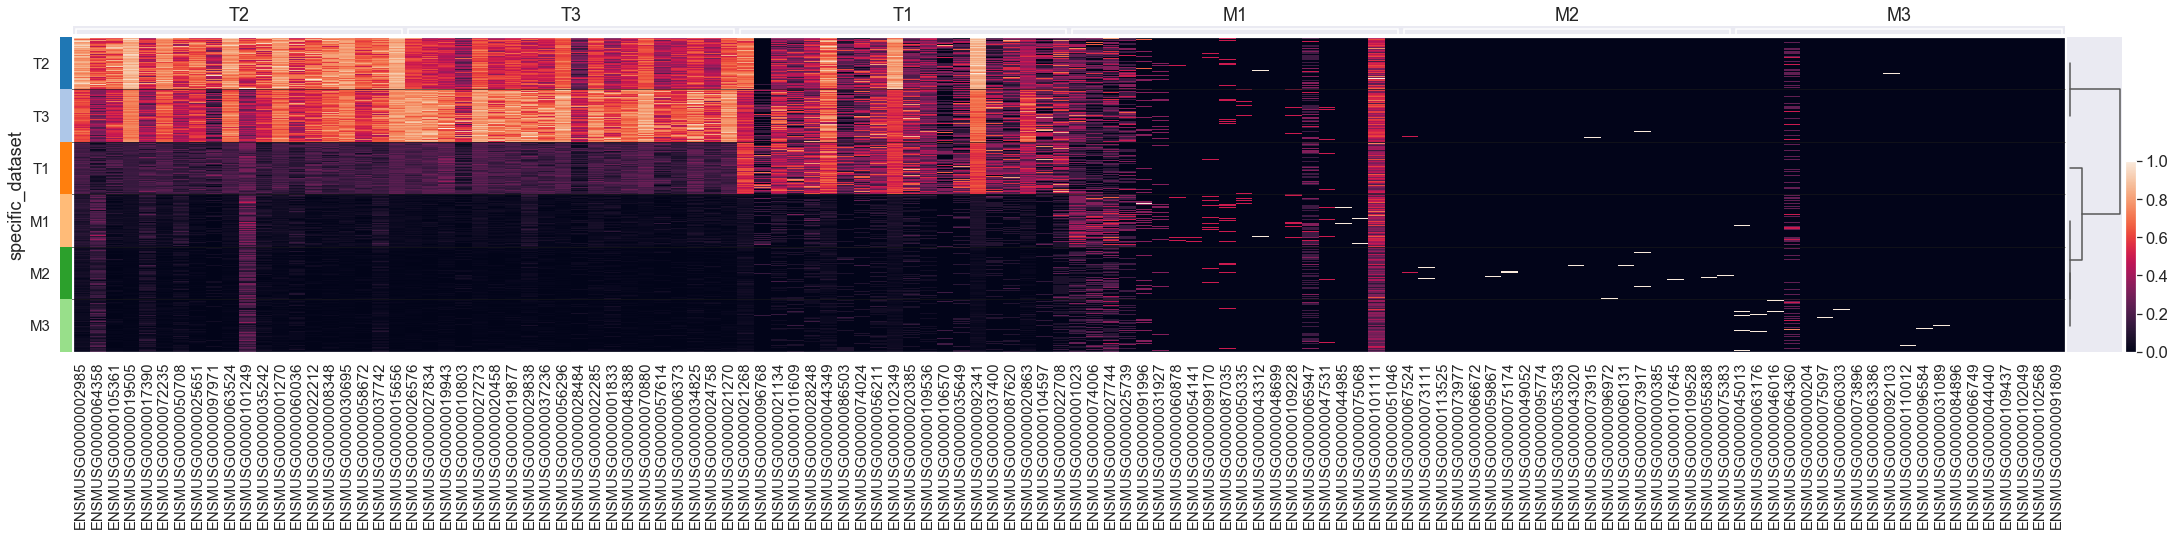

In [94]:
sc.pl.rank_genes_groups_heatmap(
    data, n_genes=20, standard_scale="var", show_gene_labels=True
)

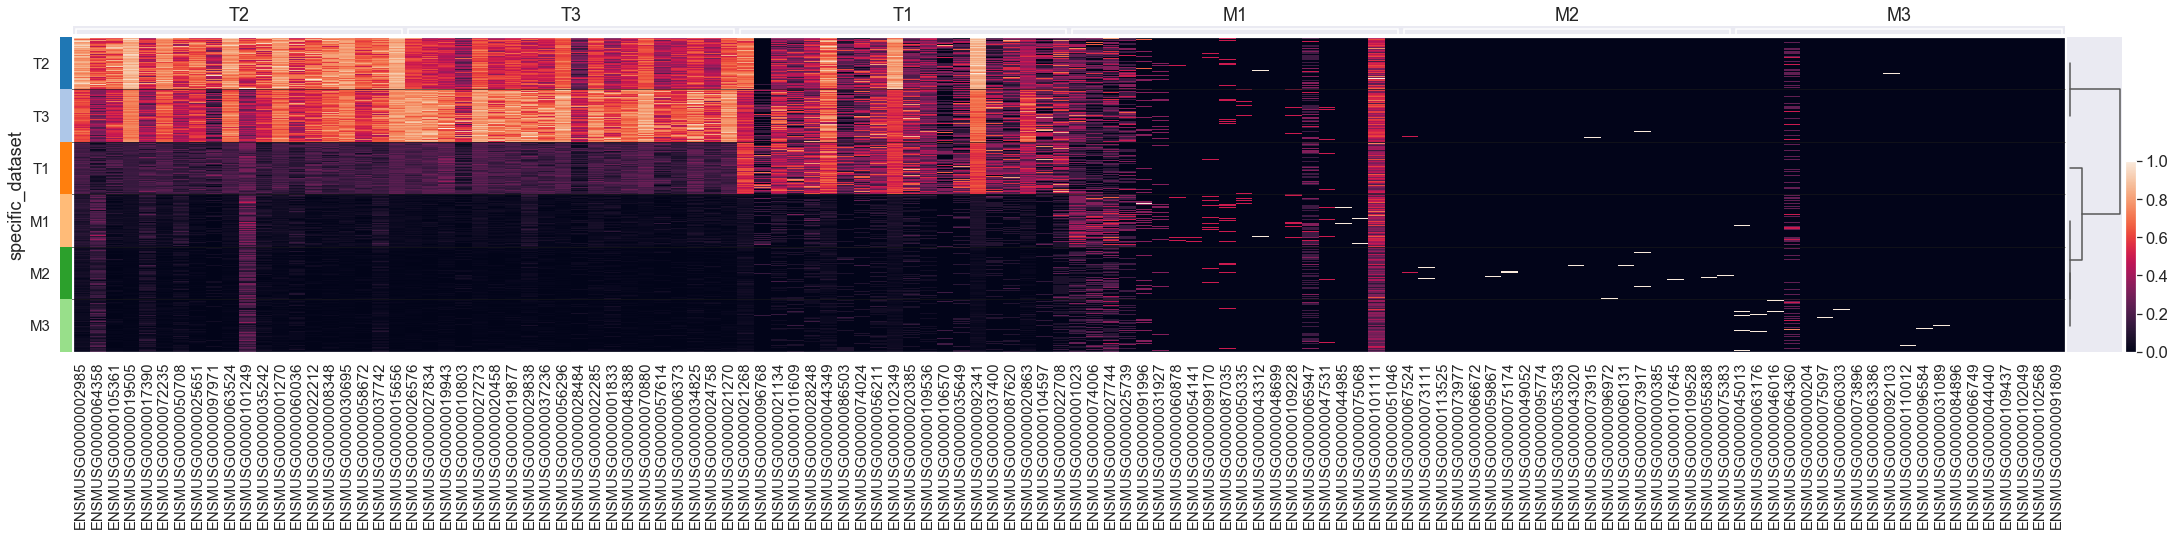

In [95]:
sc.pl.rank_genes_groups_heatmap(
    sim_data, n_genes=20, standard_scale="var", show_gene_labels=True
)

In [ ]:
import numpy as np

ad = data.copy()
ad.raw.X.data = np.exp(ad.raw.X.data)

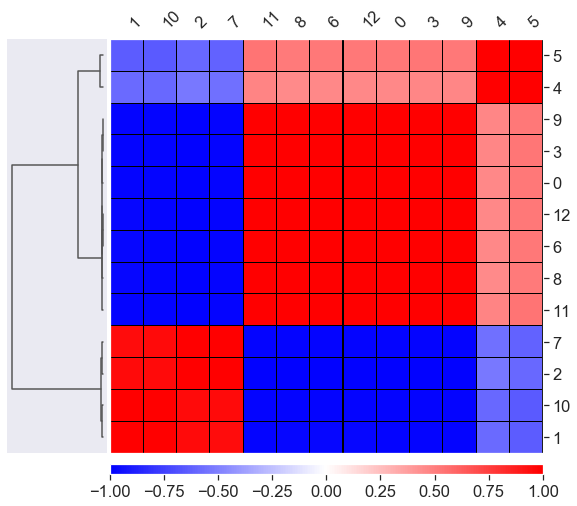

In [92]:
ax = sc.pl.correlation_matrix(data, "louvain")

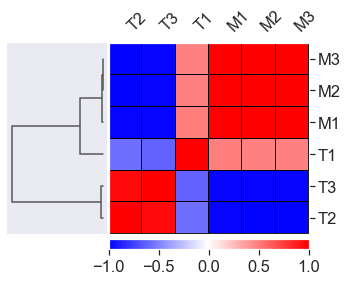

In [93]:
ax = sc.pl.correlation_matrix(data, "specific_dataset")

In [ ]:
marker_genes = ["Gfap", "Rbfox3", "Gad2", "Slc17a7", "Tmem119", "Pdgfra", "Mbp", "Mog"]

In [ ]:
ad = data.copy()
ad.raw.X.data = np.exp(ad.raw.X.data)

In [96]:
ax = sc.pl.stacked_violin(
    data,
    marker_genes,
    groupby="louvain",
    swap_axes=True,
    var_group_positions=[(7, 8)],
    var_group_labels=["neurons"],
    dendrogram=True,
)

NameError: name 'marker_genes' is not defined

# Making Similarity Matrix

### (back to writing original code)

In [ ]:
# takes in list of tuples of dataframes, ex. [(names_df, scores_df)]
def make_dataframe_for_similarity_matrix(list_of_datasets):
    # first make outline of dataframe, then will fill with values
    list_of_cluster_names = []
    gene_list = []
    for names, scores in list_of_datasets:
        list_of_cluster_names = list_of_cluster_names + list(names.columns)
        for row_list in names.values.tolist():  # returns dataframe as list of lists
            for gene_name in row_list:
                if gene_name not in gene_list:
                    gene_list.append(gene_name)
    # print(gene_list) #(good test)

    list_of_lists = []
    zero_list = [0] * len(gene_list)
    for i in range(0, len(list_of_cluster_names)):
        list_of_lists.append(zero_list)

    df = pd.DataFrame(list_of_lists, columns=gene_list, index=list_of_cluster_names)
    # print(df) #testing before filling

    # now that dataframe is generated, need to put in the values

    for names, scores in list_of_datasets:
        for column_index in range(0, len(names.columns)):
            for row_index in range(0, len(names.index)):
                gene = names.iat[row_index, column_index]

                df.at[names.columns[column_index], gene] = scores.get_value(
                    row_index, column_index, takeable=True
                )

    return df

In [ ]:
def negate_e(x):
    y = 100 - x
    return y

In [ ]:
def negate_c(x):
    y = 1 - x
    return y

In [ ]:
def make_similarity_matrix_Euclidian(df):
    pairwise = pd.DataFrame(squareform(pdist(df)), columns=df.index, index=df.index)
    pairwise_negated = pairwise.applymap(negate_e)
    print(pairwise_negated)
    plt.figure(figsize=(10, 10))
    sns.heatmap(pairwise_negated, cmap="OrRd", linewidth=1)

In [ ]:
def make_similarity_matrix_cosine(df):
    pairwise = pd.DataFrame(
        squareform(pdist(df, metric="cosine")), columns=df.index, index=df.index
    )
    pairwise_negated = pairwise.applymap(negate_c)
    print(pairwise_negated)
    plt.figure(figsize=(10, 10))
    sns.heatmap(pairwise_negated, cmap="OrRd", linewidth=1)

In [ ]:
def make_similarity_matrix_cosine_mask_diagonal(df):
    pairwise = pd.DataFrame(
        squareform(pdist(df, metric="cosine")), columns=df.index, index=df.index
    )
    pairwise_negated = pairwise.applymap(negate_c)

    mask = np.zeros(pairwise_negated.shape, dtype=bool)
    mask[np.triu_indices(len(mask))] = True
    plt.figure(figsize=(10, 10))
    sns.heatmap(pairwise_negated, cmap="OrRd", linewidth=1, mask=mask, vmax=0.4, vmin=0)

In [ ]:
make_similarity_matrix_Euclidian(df_for_matrix)

In [ ]:
sndata_markers = pd.read_csv("piform_snRNA-Seq_marker_genes.csv")
sndata_markers_scores = pd.read_csv("piform_snRNA-Seq_marker_genes_scores.csv")

In [ ]:
sc.tl.rank_genes_groups(sim_by_layer, "layer")
sim_names_layer = pd.DataFrame(sim_by_layer.uns["rank_genes_groups"]["names"])
sim_scores_layer = pd.DataFrame(sim_by_layer.uns["rank_genes_groups"]["scores"])

In [ ]:
# testing sim matrix
df_for_matrix = make_dataframe_for_similarity_matrix(
    [(sndata_markers, sndata_markers_scores), (sim_names_layer, sim_scores_layer)]
)

In [ ]:
make_similarity_matrix_cosine(df_for_matrix)

In [ ]:
make_similarity_matrix_cosine_mask_diagonal(df_for_matrix)

In [ ]:
make_correlation_matrix(df_for_matrix)

## Testing pre-selected neurons vs. simulated nuclei considering all genes (reading in separately)

In [ ]:
# reading in already generated nuclei from h5ad
simulated_nuclei = ad.read_h5ad("simulated_piriform_nuclei.h5ad")

In [ ]:
sc.tl.rank_genes_groups(simulated_nuclei, "dataset")
simulated_names_all = pd.DataFrame(simulated_nuclei.uns["rank_genes_groups"]["names"])
simulated_names_all.to_csv("simulated_names_all.csv")

simulated_names_all.columns = [
    "sim A1",
    "sim A2",
    "sim A3",
    "sim B1",
    "sim B2",
    "sim B3",
    "sim C1",
    "sim C2",
    "sim C3",
]

In [ ]:
sc.tl.rank_genes_groups(simulated_nuclei, "dataset")
simulated_scores_all = pd.DataFrame(simulated_nuclei.uns["rank_genes_groups"]["scores"])
simulated_scores_all.to_csv("simulated_scores_all.csv")

simulated_scores_all.columns = [
    "sim A1",
    "sim A2",
    "sim A3",
    "sim B1",
    "sim B2",
    "sim B3",
    "sim C1",
    "sim C2",
    "sim C3",
]

In [ ]:
# reading in data
preselected_names_all = pd.read_csv("preselected_clustering_names_all.csv")
preselected_names_all.columns = ["seq 0", "seq 1", "seq 2", "seq 3", "seq 4"]
preselected_scores_all = pd.read_csv("preselected_clustering_scores_all.csv")
preselected_scores_all.columns = ["seq 0", "seq 1", "seq 2", "seq 3", "seq 4"]

In [ ]:
# only considering top 30
# pre-selected snRNA-Seq
preselected_names_top = pd.read_csv("preselected_clustering_names_top.csv")
preselected_names_top.columns = ["seq 0", "seq 1", "seq 2", "seq 3", "seq 4"]
preselected_scores_top = pd.read_csv("preselected_clustering_scores_top.csv")
preselected_scores_top.columns = ["seq 0", "seq 1", "seq 2", "seq 3", "seq 4"]

# simulated
simulated_names_top = pd.read_csv(
    "simulated_pirifrom_nuclei_marker_genes_by_dataset.csv"
)
simulated_names_top.columns = [
    "sim A1",
    "sim A2",
    "sim A3",
    "sim B1",
    "sim B2",
    "sim B3",
    "sim C1",
    "sim C2",
    "sim C3",
]
simulated_scores_top = pd.read_csv(
    "simulated_pirifrom_nuclei_marker_genes_by_dataset_scores.csv"
)
simulated_scores_top.columns = [
    "sim A1",
    "sim A2",
    "sim A3",
    "sim B1",
    "sim B2",
    "sim B3",
    "sim C1",
    "sim C2",
    "sim C3",
]

In [ ]:
matrix_df_all = make_dataframe_for_similarity_matrix(
    [
        (simulated_names_all, simulated_scores_all),
        (preselected_names_all, preselected_scores_all),
    ]
)

In [ ]:
matrix_preselected_layer = make_dataframe_for_similarity_matrix(
    [
        (preselected_names_all, preselected_scores_all),
        (sim_names_layer, sim_scores_layer),
    ]
)

In [ ]:
matrix_df_top = make_dataframe_for_similarity_matrix(
    [
        (simulated_names_top, simulated_scores_top),
        (preselected_names_top, preselected_scores_top),
    ]
)

In [ ]:
def make_correlation_matrix(df):
    transposed_df = df.T
    corr = transposed_df.corr(method="pearson")

    mask = np.zeros(corr.shape, dtype=bool)
    mask[np.triu_indices(len(mask))] = True

    plt.figure(figsize=(10, 10))
    sns.heatmap(
        corr,
        cmap="bwr",
        linewidth=1,
        # vmin = -0.1, #anchor the colormap
        center=0,
        vmax=0.3,  # anchor the colormap
        mask=mask,
        annot=True,
    )  # write value in the cell

In [ ]:
make_correlation_matrix(matrix_preselected_layer)

In [ ]:
make_similarity_matrix_cosine(matrix_preselected_layer)

In [ ]:
make_similarity_matrix_cosine_mask_diagonal(matrix_preselected_layer)

In [ ]:
make_correlation_matrix(matrix_df_all)

In [ ]:
make_correlation_matrix(matrix_df_top)

In [ ]:
make_similarity_matrix_cosine(matrix_df_all)

# Trying removing top astrocyte genes from simulation

In [ ]:
top_astro_and_oligo_genes = [
    line.rstrip("\n") for line in open("top_astrocytes_and_oligo_genes.txt")
]
print(top_astro_and_oligo_genes)

In [ ]:
# takes in list of tuples of dataframes, ex. [(names_df, scores_df)] and list_to_remove
# list_to_remove is the list of genes to remove
def make_dataframe_for_similarity_matrix_with_removal(list_of_datasets, list_to_remove):
    # first make outline of dataframe, then will fill with values
    list_of_cluster_names = []
    gene_list = []
    for names, scores in list_of_datasets:
        list_of_cluster_names = list_of_cluster_names + list(names.columns)
        for row_list in names.values.tolist():  # returns dataframe as list of lists
            for gene_name in row_list:
                if gene_name not in gene_list:
                    gene_list.append(gene_name)
    # print(gene_list) #(good test)

    list_of_lists = []
    zero_list = [0] * len(gene_list)
    for i in range(0, len(list_of_cluster_names)):
        list_of_lists.append(zero_list)

    df = pd.DataFrame(list_of_lists, columns=gene_list, index=list_of_cluster_names)
    # print(df) #testing before filling

    # now that dataframe is generated, need to put in the values

    for names, scores in list_of_datasets:
        for column_index in range(0, len(names.columns)):
            for row_index in range(0, len(names.index)):
                gene = names.iat[row_index, column_index]
                if gene in list_to_remove:
                    df.at[names.columns[column_index], gene] = 0
                else:
                    df.at[names.columns[column_index], gene] = scores.get_value(
                        row_index, column_index, takeable=True
                    )

    return df

### Top astrocty and oligo genes removed: Pre-selected snRNA-Seq, simulated by layer

In [ ]:
astro_removed_preselected_layer = make_dataframe_for_similarity_matrix_with_removal(
    [
        (preselected_names_all, preselected_scores_all),
        (sim_names_layer, sim_scores_layer),
    ],
    top_astro_and_oligo_genes,
)

In [ ]:
make_correlation_matrix(astro_removed_preselected_layer)

In [ ]:
new_make_similarity_matrix_cosine(astro_removed_preselected_layer, True)

In [ ]:
new_make_similarity_matrix_cosine(astro_removed_preselected_layer, False)

# Trying a new cosine similarity function

In [ ]:
def new_make_similarity_matrix_cosine(df, mask_diagonal):
    cos_sim = pd.DataFrame(cosine_similarity(df, df), columns=df.index, index=df.index)

    # print(cos_sim)
    plt.figure(figsize=(10, 10))
    if mask_diagonal == True:
        mask = np.zeros(cos_sim.shape, dtype=bool)
        mask[np.triu_indices(len(mask))] = True
        plt.figure(figsize=(10, 10))
        sns.heatmap(cos_sim, cmap="OrRd", linewidth=1, mask=mask, vmax=0.4, vmin=0)
    else:
        sns.heatmap(cos_sim, cmap="OrRd", linewidth=1)

In [ ]:
new_make_similarity_matrix_cosine(matrix_df_all, False)

In [ ]:
new_make_similarity_matrix_cosine(matrix_df_all, True)

# Trying dropping (code worked, strategy didn't)

In [ ]:
sc.tl.rank_genes_groups(dropped_sim, "dataset")
dropped_sim_names_dataset = pd.DataFrame(dropped_sim.uns["rank_genes_groups"]["names"])
dropped_sim_scores_dataset = pd.DataFrame(
    dropped_sim.uns["rank_genes_groups"]["scores"]
)

In [ ]:
sc.tl.rank_genes_groups(dropped_sim, "dataset")
dropped_sim_names_dataset_top = pd.DataFrame(
    dropped_sim.uns["rank_genes_groups"]["names"]
).head(30)
dropped_sim_scores_dataset_top = pd.DataFrame(
    dropped_sim.uns["rank_genes_groups"]["scores"]
).head(30)

In [ ]:
sc.tl.rank_genes_groups(dropped_sim, "layer")
dropped_sim_names_layer = pd.DataFrame(dropped_sim.uns["rank_genes_groups"]["names"])
dropped_sim_scores_layer = pd.DataFrame(dropped_sim.uns["rank_genes_groups"]["scores"])

In [ ]:
sc.tl.rank_genes_groups(dropped_sim, "layer")
dropped_sim_names_layer_top = pd.DataFrame(
    dropped_sim.uns["rank_genes_groups"]["names"]
).head(30)
dropped_sim_scores_layer_top = pd.DataFrame(
    dropped_sim.uns["rank_genes_groups"]["scores"]
).head(30)

In [ ]:
matrix_df_dropped_dataset = make_dataframe_for_similarity_matrix(
    [
        (dropped_sim_names_dataset, dropped_sim_scores_dataset),
        (preselected_names_all, preselected_scores_all),
    ]
)

matrix_df_dropped_layer = make_dataframe_for_similarity_matrix(
    [
        (dropped_sim_names_layer, dropped_sim_scores_layer),
        (preselected_names_all, preselected_scores_all),
    ]
)

In [ ]:
matrix_df_dropped_dataset_top = make_dataframe_for_similarity_matrix(
    [
        (dropped_sim_names_dataset_top, dropped_sim_scores_dataset_top),
        (preselected_names_top, preselected_scores_top),
    ]
)

matrix_df_dropped_layer_top = make_dataframe_for_similarity_matrix(
    [
        (dropped_sim_names_layer_top, dropped_sim_scores_layer_top),
        (preselected_names_top, preselected_scores_top),
    ]
)

In [ ]:
make_correlation_matrix(matrix_df_dropped_dataset)

In [ ]:
make_correlation_matrix(matrix_df_dropped_dataset_top)

In [ ]:
make_correlation_matrix(matrix_df_dropped_layer)

In [ ]:
make_correlation_matrix(matrix_df_dropped_layer_top)

In [ ]:
simulated_names_top

### Trying to convert everything to ENSMUST

In [ ]:
preselected_IDs_all = preselected_names_all.copy()
# preselected_IDs_all = pd.DataFrame()
for col in ["seq 0", "seq 1", "seq 2", "seq 3", "seq 4"]:
    symbol_list = preselected_names_all[col].values.tolist()

    mg_ID_dataframe = mg.querymany(
        symbol_list,
        scopes="symbol",
        fields="ensembl.transcript",
        species="mouse",
        as_dataframe=True,
        returnall=True,
    )
    print(mg_ID_dataframe)
    id_list = mg_ID_dataframe["ensembl.transcript"].values.tolist()
    # print(id_list)

    # preselected_IDs_all.col = id_list
    preselected_IDs_all[col] = id_list
    # df.replace(symbol_list,id_list) #not sure this will work
preselected_IDs_all

In [ ]:
# trying gene instead of transcript
preselected_IDs_all = preselected_names_all.copy()
# preselected_IDs_all = pd.DataFrame()
for col in ["seq 0", "seq 1", "seq 2", "seq 3", "seq 4"]:
    symbol_list = preselected_names_all[col].values.tolist()

    mg_ID_dataframe = mg.querymany(
        symbol_list,
        scopes="symbol",
        fields="ensembl.gene",
        species="mouse",
        as_dataframe=True,
        returnall=True,
    )
    print(mg_ID_dataframe)
    print(mg_ID_dataframe.columns)
    id_list = mg_ID_dataframe["ensembl.gene"].values.tolist()
    # print(id_list)

    # preselected_IDs_all.col = id_list
    preselected_IDs_all[col] = id_list
    # df.replace(symbol_list,id_list) #not sure this will work
preselected_IDs_all